In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [21]:
print("X_train shape: ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (60000, 28, 28)
Y_train shape  (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


In [22]:
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test,axis=0)
Y = keras.utils.to_categorical(Y)

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 8)


In [43]:
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])

In [24]:
print("X_train shape: ",X_train.shape)
print("Y_train shape ",Y_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (49000, 28, 28)
Y_train shape  (49000, 10)
X_test shape:  (21000, 28, 28)
Y_test shape:  (21000, 10)


In [39]:
#MLP
mlp_model = keras.models.Sequential([
                  # keras.layers.Flatten(),
                  keras.layers.Dense(units=256, activation="relu", input_shape=(784,)),
                  keras.layers.Dense(units=256, activation="relu"),
                  keras.layers.Dense(units=10,activation="softmax")
])

In [40]:
mlp_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


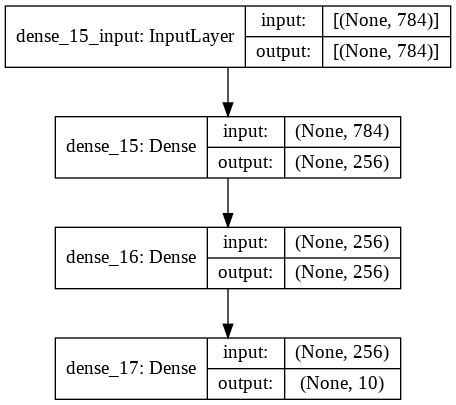

In [41]:
keras.utils.plot_model(mlp_model, show_shapes=True)

In [28]:
### LR Schedulers with exponential annealing

lr_scheduler = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3,decay_steps=10000,decay_rate=0.9)

In [29]:
###Optimizers:


In [46]:
#Adam

adamopm = keras.optimizers.Adam(learning_rate=lr_scheduler)
mlp_model.compile(optimizer=adamopm,loss="categorical_crossentropy",metrics=["accuracy"])
mlphist = mlp_model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.1151 - accuracy: 0.9742
Epoch 2/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0927 - accuracy: 0.9769
Epoch 3/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0874 - accuracy: 0.9781
Epoch 4/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0800 - accuracy: 0.9813
Epoch 5/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0773 - accuracy: 0.9822
Epoch 6/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0682 - accuracy: 0.9828
Epoch 7/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0610 - accuracy: 0.9858
Epoch 8/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0565 - accuracy: 0.9857
Epoch 9/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.0529 - accuracy: 0.9869
Epoch 10/10
1532/1532 [==============================] - 4s 3ms/step - loss: 0.049

In [45]:
mlp_model.evaluate(X_test,Y_test,batch_size=32)

657/657 [==============================] - 1s 2ms/step - loss: 0.1737 - accuracy: 0.9646


[0.1736893653869629, 0.9646190404891968]

Text(0.5, 0, 'epoch')

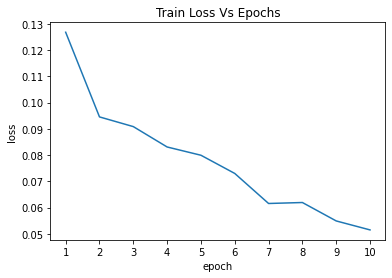

In [48]:
x_axis = [i for i in range(1,len(mlphist.history['loss'])+1)]
plt.xticks(np.array(x_axis))
plt.plot(x_axis, mlphist.history['loss'])
plt.title('Train Loss Vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')